In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-55.67299206006471 78.3236960329458
-62.85781442297256 -57.73305144317392
54.33143567981236 -0.35690104799707
70.40442740242364 88.32449520988808
-33.650447760136515 -88.00486439512864
56.39866877076068 86.03133281575623
-65.68853147963023 -98.77391612970854
18.26300943495947 25.652186864433787
28.99194303258939 154.14608290556254
54.276661656394396 141.02274389556385
39.93998603699626 137.5514505393872
59.390883580258475 -110.36361697815616
0.44244721271434173 -67.11008797216827
7.674086263177159 -100.273362495016
-9.590831021567183 115.1833261519161
-66.56843684958845 81.70390002236786
80.29874669517943 25.956076458240943
28.32655357328045 12.323976695098366
27.434289306209962 -119.64952397193687
-52.699659948701104 83.63159624929278
-15.105425216599144 41.42203091041324
71.82132955435412 69.3448923653414
32.50743446238502 101.59359164792028
-0.16430725129018242 140.4593973894937
2.754108212469845 -135.89831458584905
46.89800651399045 131.60173693967715
77.41100547008472 163.47529423

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

646

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | scarborough
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | anzhero-sudzhensk
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | kutum
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | mnogovershinnyy
Processing Record 11 of Set 1 | ryotsu
Processing Record 12 of Set 1 | grand centre
City not found. Skipping...
Processing Record 13 of Set 1 | sao gabriel da cachoeira
Processing Record 14 of Set 1 | puerto escondido
Processing Record 15 of Set 1 | denpasar
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | honningsvag
Processing Record 18 of Set 1 | awbari
Processing Record 19 of Set 1 | san quintin
Processing Record 20 of Set 1 | mocambique
City not found. Skipping...
Processing Record 21 of Set 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Souillac,-20.5167,57.5167,70.27,79,30,15.68,MU,2022-07-22 16:22:19
1,Ushuaia,-54.8000,-68.3000,35.44,81,97,16.64,AR,2022-07-22 16:22:19
2,Scarborough,54.2797,-0.4044,61.93,73,100,3.00,GB,2022-07-22 16:22:14
3,Talnakh,69.4865,88.3972,64.76,60,72,5.48,RU,2022-07-22 16:22:19
4,Lebu,-37.6167,-73.6500,54.10,97,100,10.71,CL,2022-07-22 16:22:20


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Souillac,MU,2022-07-22 16:22:19,-20.5167,57.5167,70.27,79,30,15.68
1,Ushuaia,AR,2022-07-22 16:22:19,-54.8000,-68.3000,35.44,81,97,16.64
2,Scarborough,GB,2022-07-22 16:22:14,54.2797,-0.4044,61.93,73,100,3.00
3,Talnakh,RU,2022-07-22 16:22:19,69.4865,88.3972,64.76,60,72,5.48
4,Lebu,CL,2022-07-22 16:22:20,-37.6167,-73.6500,54.10,97,100,10.71


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

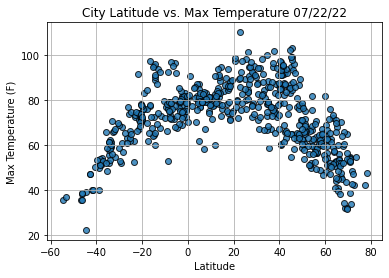

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

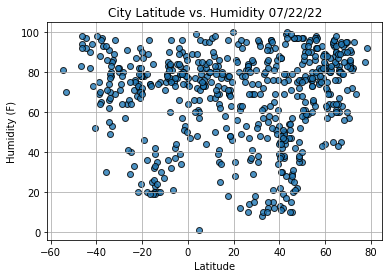

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

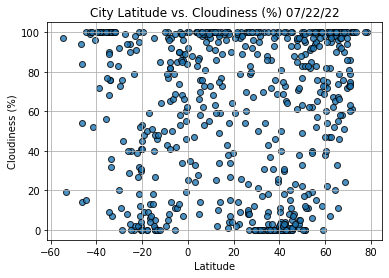

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

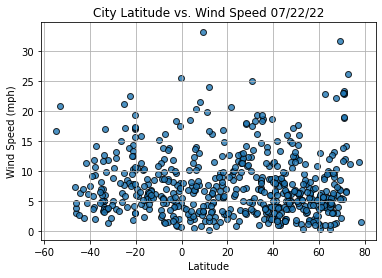

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()   

In [27]:
city_data_df.head(20)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Souillac,MU,2022-07-22 16:22:19,-20.5167,57.5167,70.27,79,30,15.68
1,Ushuaia,AR,2022-07-22 16:22:19,-54.8000,-68.3000,35.44,81,97,16.64
2,Scarborough,GB,2022-07-22 16:22:14,54.2797,-0.4044,61.93,73,100,3.00
3,Talnakh,RU,2022-07-22 16:22:19,69.4865,88.3972,64.76,60,72,5.48
4,Lebu,CL,2022-07-22 16:22:20,-37.6167,-73.6500,54.10,97,100,10.71
5,Anzhero-Sudzhensk,RU,2022-07-22 16:22:20,56.0810,86.0285,56.23,98,83,6.26
6,Punta Arenas,CL,2022-07-22 16:22:21,-53.1500,-70.9167,37.11,70,19,20.89
7,Kutum,SD,2022-07-22 16:22:21,14.2000,24.6667,88.50,25,14,11.45
8,Hasaki,JP,2022-07-22 16:22:21,35.7333,140.8333,77.29,91,37,18.61
9,Mnogovershinnyy,RU,2022-07-22 16:22:22,53.9353,139.9242,49.57,76,85,4.12


In [28]:
index13 = city_data_df.loc[13]
index13

City                     Denpasar
Country                        ID
Date          2022-07-22 16:22:23
Lat                         -8.65
Lng                      115.2167
Max Temp                    76.89
Humidity                       83
Cloudiness                    100
Wind Speed                    8.7
Name: 13, dtype: object

In [30]:
city_data_df['Lat'] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
577    False
578     True
579     True
580    False
581    False
Name: Lat, Length: 582, dtype: bool

In [31]:
city_data_df.loc[(city_data_df['Lat'] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Scarborough,GB,2022-07-22 16:22:14,54.2797,-0.4044,61.93,73,100,3.00
3,Talnakh,RU,2022-07-22 16:22:19,69.4865,88.3972,64.76,60,72,5.48
5,Anzhero-Sudzhensk,RU,2022-07-22 16:22:20,56.0810,86.0285,56.23,98,83,6.26
7,Kutum,SD,2022-07-22 16:22:21,14.2000,24.6667,88.50,25,14,11.45
8,Hasaki,JP,2022-07-22 16:22:21,35.7333,140.8333,77.29,91,37,18.61
...,...,...,...,...,...,...,...,...,...
571,Khvorostyanka,RU,2022-07-22 16:37:21,52.6096,48.9597,63.25,93,83,5.12
572,Dobresti,RO,2022-07-22 16:37:22,46.8500,22.3000,91.76,21,23,4.63
576,Gouyave,GD,2022-07-22 16:37:23,12.1646,-61.7296,81.73,71,25,16.62
578,Kampong Chhnang,KH,2022-07-22 16:37:24,12.1667,104.5500,78.69,79,59,2.30


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

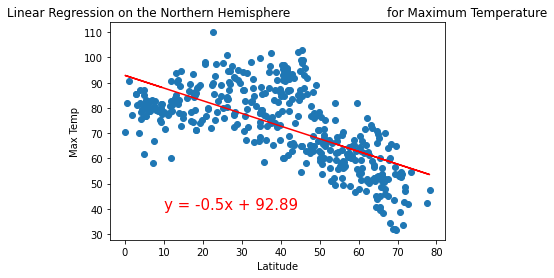

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

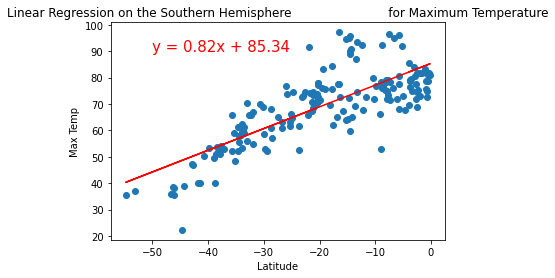

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

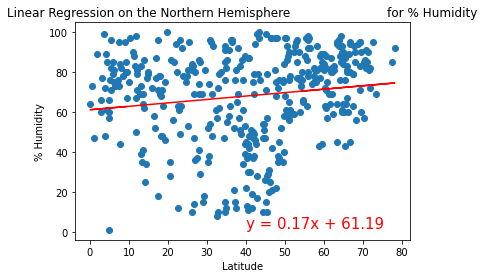

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,2))

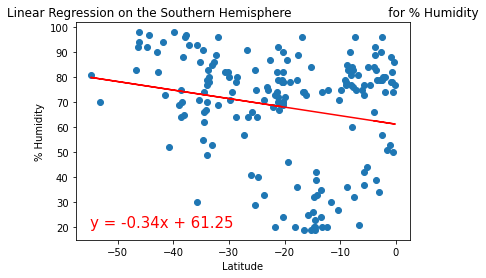

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,20))

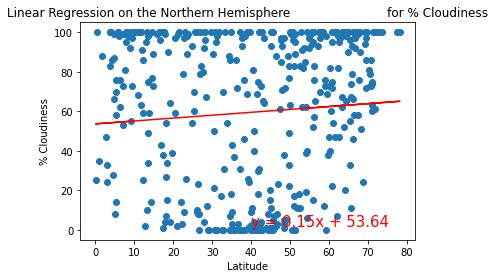

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,2))

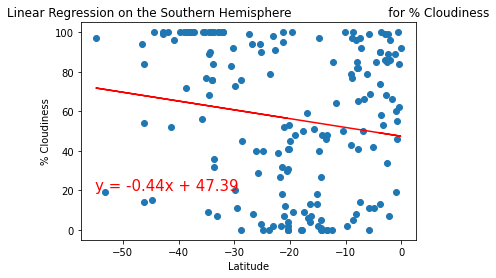

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,20))

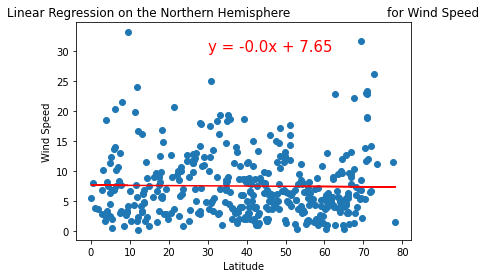

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,30))

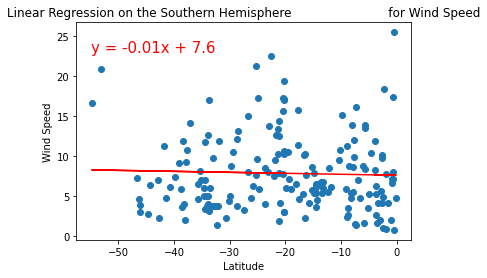

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-55,23))